In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
df.head(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
df["Operating Airline"].value_counts()

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: Operating Airline, Length: 89, dtype: int64

In [5]:
df["GEO Summary"].value_counts()

International    11904
Domestic          6981
Name: GEO Summary, dtype: int64

In [6]:
df["Operating Airline IATA Code"].value_counts()

UA    3807
OO    1212
AS     891
VX     462
DL     445
      ... 
IB       6
WO       3
XP       2
5Y       2
EZ       2
Name: Operating Airline IATA Code, Length: 82, dtype: int64

In [7]:
df["Published Airline IATA Code"].value_counts()

UA     4649
AS     1203
DL      975
AA      588
AC      484
       ... 
BBB       6
WO        3
EZ        2
XP        2
5Y        2
Name: Published Airline IATA Code, Length: 73, dtype: int64

In [8]:
df["Operating Airline"].unique()

array(['ATA Airlines', 'Air Canada', 'Air China', 'Air France',
       'Air New Zealand', 'AirTran Airways', 'Alaska Airlines',
       'All Nippon Airways', 'American Airlines',
       'American Eagle Airlines', 'Asiana Airlines',
       'Atlantic Southeast Airlines', 'BelAir Airlines',
       'British Airways', 'Cathay Pacific', 'China Airlines',
       'Delta Air Lines', 'EVA Airways', 'Frontier Airlines',
       'Hawaiian Airlines', 'Horizon Air', 'Icelandair',
       'Independence Air', 'Japan Airlines', 'KLM Royal Dutch Airlines',
       'Korean Air Lines', 'Lufthansa German Airlines', 'Mesa Airlines',
       'Mexicana Airlines', 'Midwest Airlines', 'Northwest Airlines',
       'Philippine Airlines', 'Singapore Airlines', 'SkyWest Airlines',
       'Sun Country Airlines', 'TACA', 'US Airways', 'United Airlines',
       'United Airlines - Pre 07/01/2013', 'Virgin Atlantic',
       'WestJet Airlines', 'Boeing Company', 'Miami Air International',
       'Air Canada Jazz', 'Qantas Air

In [9]:
df["Operating Airline"].nunique()

89

In [10]:
df["Price Category Code"].value_counts()

Other       16521
Low Fare     2364
Name: Price Category Code, dtype: int64

In [11]:
x=df[["Price Category Code","Operating Airline","GEO Region","Passenger Count"]]

In [12]:
x.head()

,Price Category Code,Operating Airline,GEO Region,Passenger Count
0,Low Fare,ATA Airlines,US,27271
1,Low Fare,ATA Airlines,US,29131
2,Low Fare,ATA Airlines,US,5415
3,Other,Air Canada,Canada,35156
4,Other,Air Canada,Canada,34090


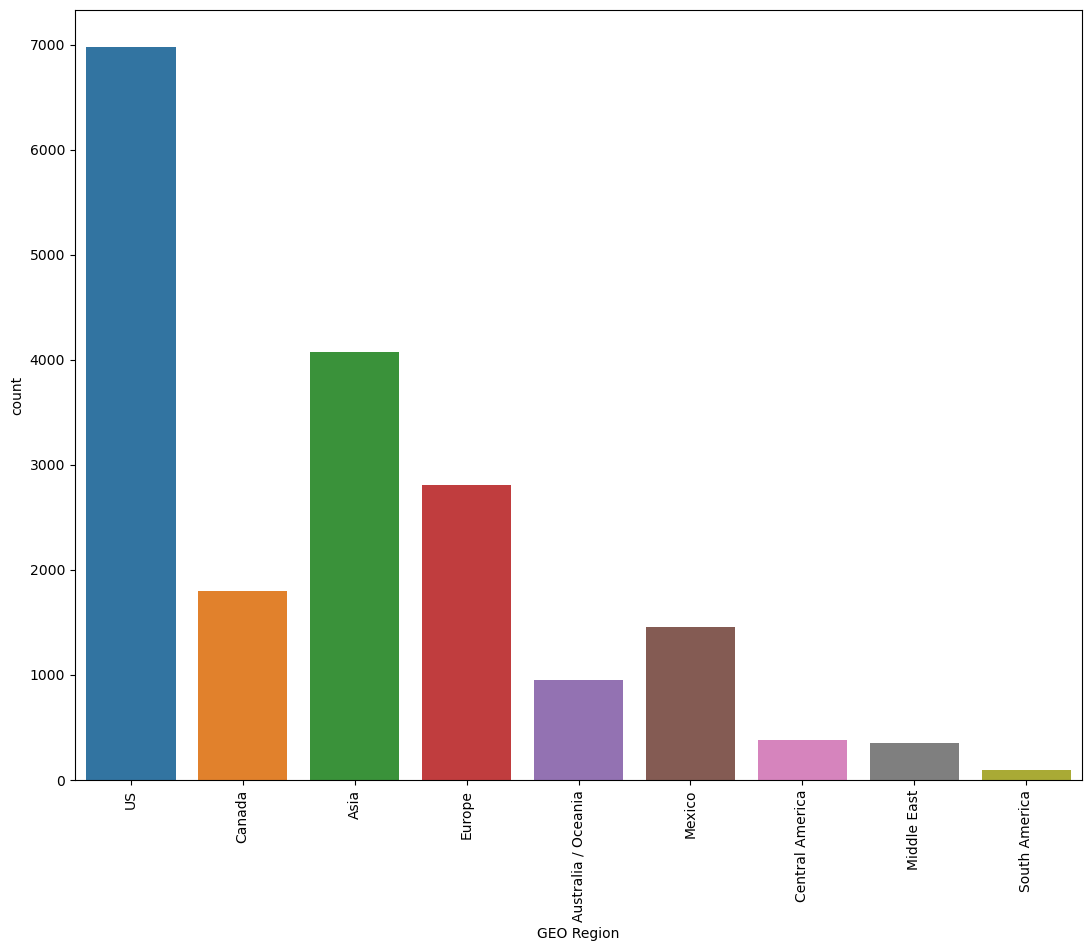

In [13]:
plt.figure(figsize=(13,10))
sns.countplot(x=df['GEO Region'])
plt.xticks(rotation=90);

In [14]:
x.isnull().sum()

Price Category Code    0
Operating Airline      0
GEO Region             0
Passenger Count        0
dtype: int64

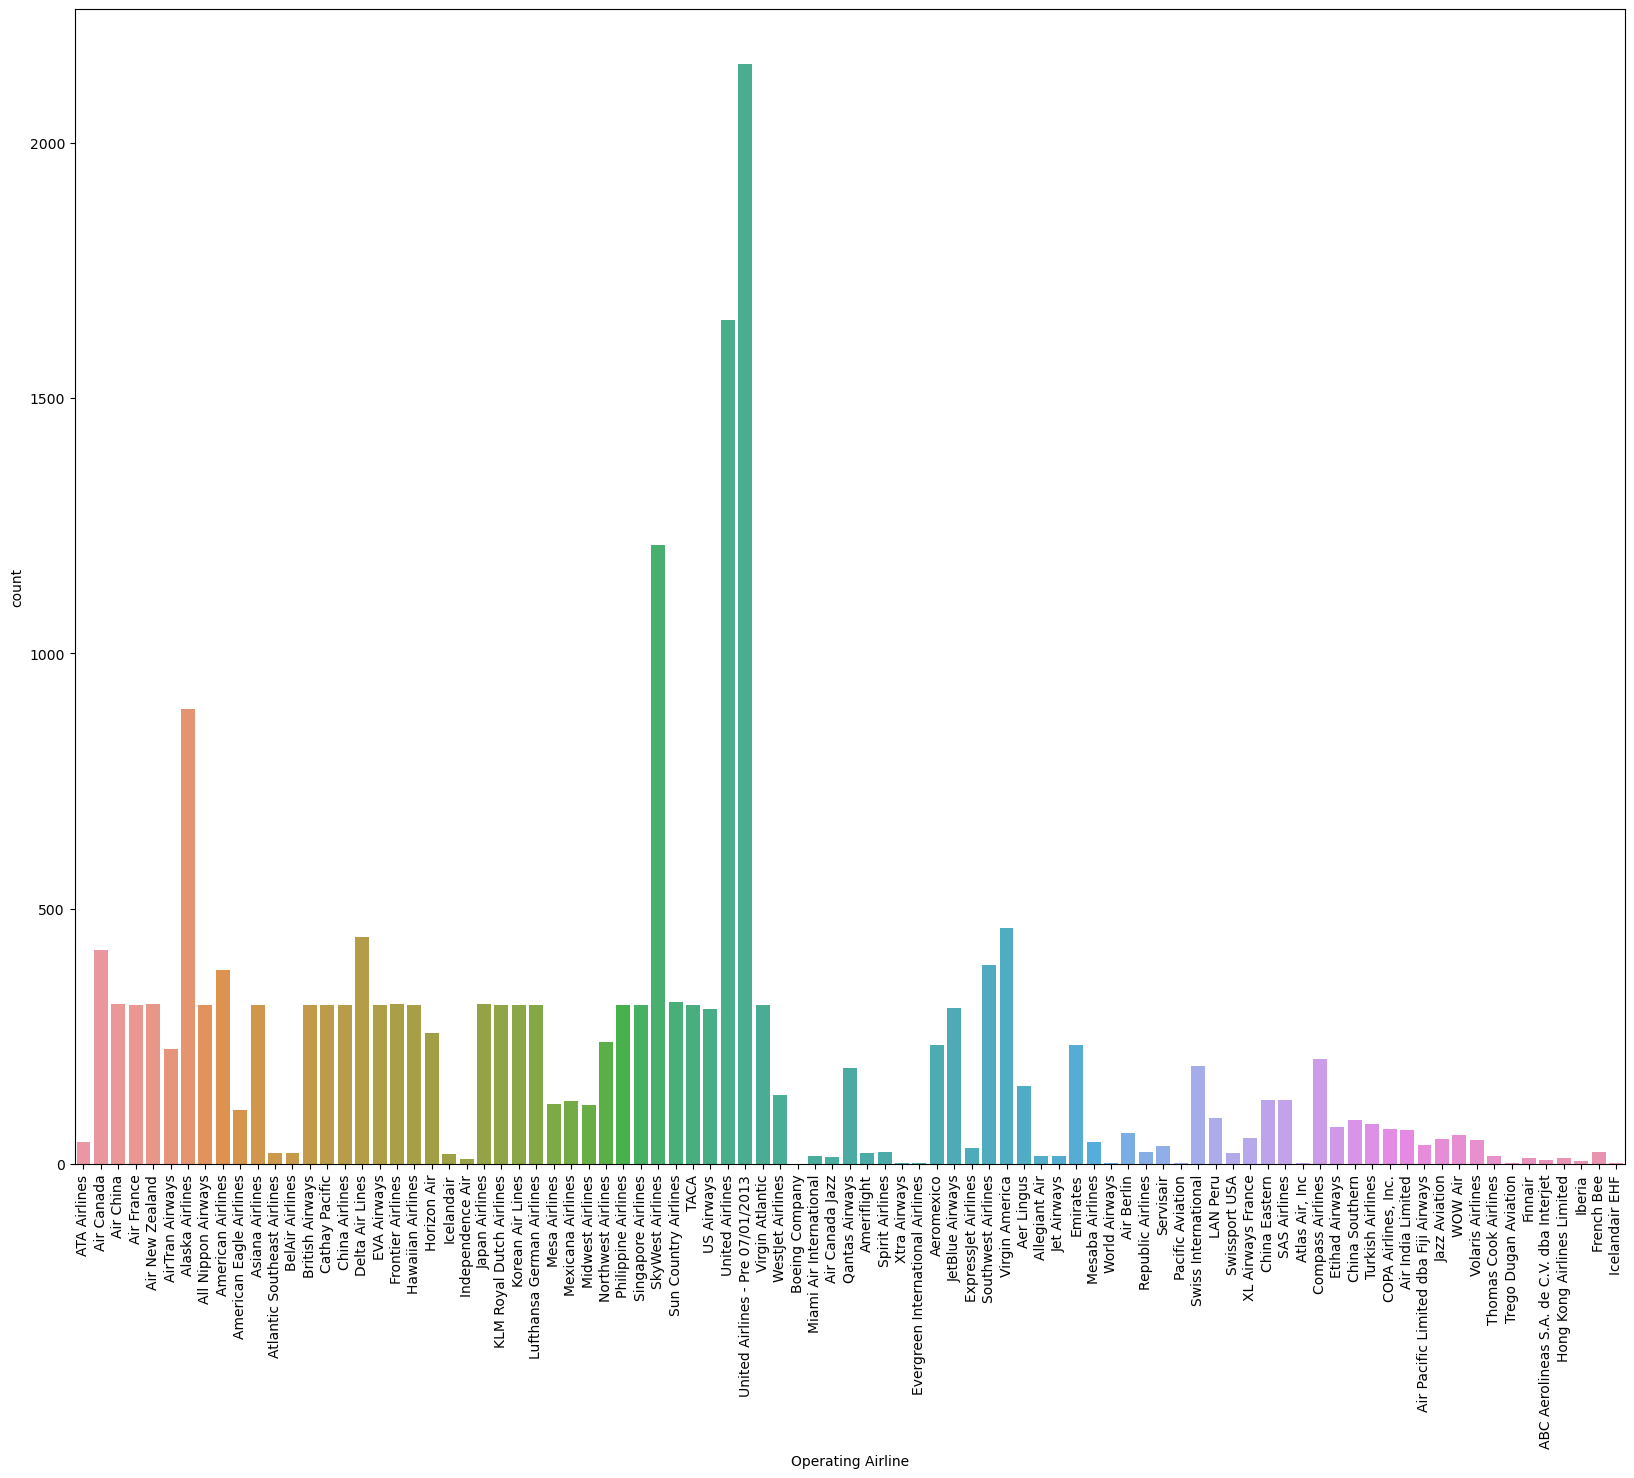

In [15]:
plt.figure(figsize=(20,15))
sns.countplot(x=df['Operating Airline'])
plt.xticks(rotation=90);

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price Category Code  18885 non-null  object
 1   Operating Airline    18885 non-null  object
 2   GEO Region           18885 non-null  object
 3   Passenger Count      18885 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 590.3+ KB


In [17]:
x=pd.get_dummies(x,drop_first=True)

In [18]:
x

,Passenger Count,Price Category Code_Other,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,...,Operating Airline_XL Airways France,Operating Airline_Xtra Airways,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US
0,27271,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,29131,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5415,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35156,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,34090,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,50,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18881,10868,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18882,11664,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18883,804,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [19]:
model=KMeans(n_clusters=4)

In [20]:
model=model.fit(x)
tahmin=model.predict(x)

In [21]:
tahmin

array([3, 3, 3, ..., 3, 3, 3])

In [22]:
x["cluster"]=tahmin

In [23]:
x

,Passenger Count,Price Category Code_Other,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,...,Operating Airline_Xtra Airways,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,cluster
0,27271,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
1,29131,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
2,5415,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
3,35156,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,34090,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,50,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
18881,10868,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
18882,11664,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
18883,804,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3


In [24]:
silhouette_score(x,tahmin)

0.7861526525593732

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


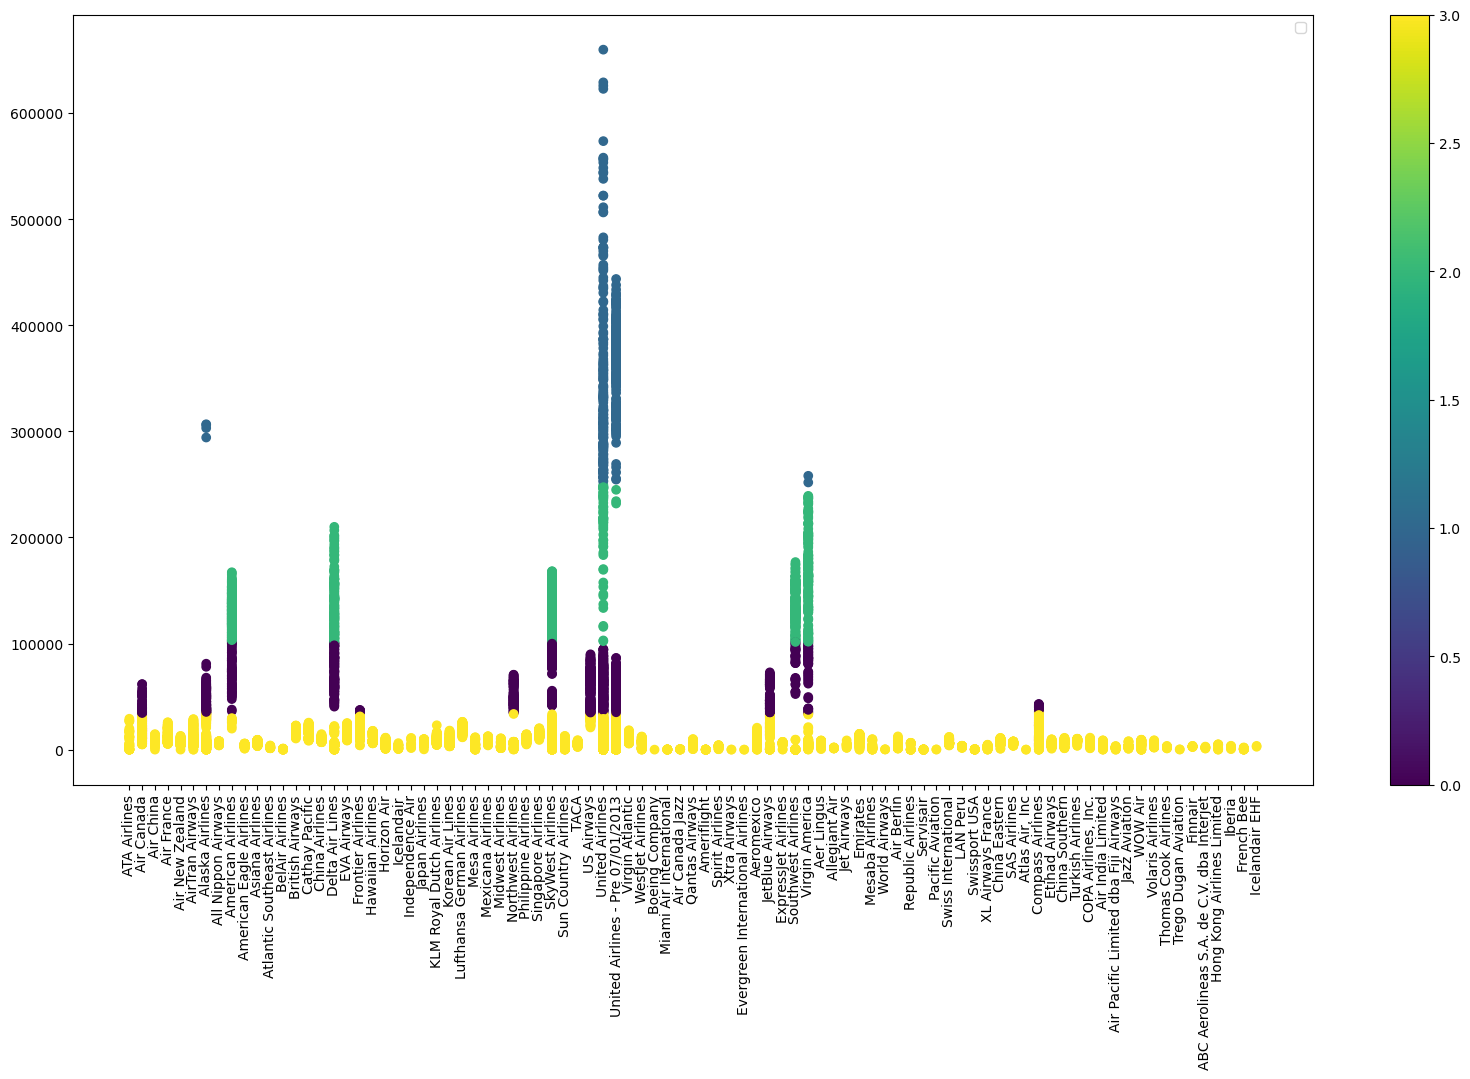

In [26]:
plt.figure(figsize=(20,10))
plt.scatter(x=df['Operating Airline'],y=df['Passenger Count'],c=tahmin)
plt.legend()
plt.colorbar()
plt.xticks(rotation=90)
plt.show();

In [27]:
allscore=[]
allclusters=[]
uzaklıklar=[]
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklık=model.inertia_
        print(" Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        uzaklıklar.append(uzaklık)
clust(11)

 Cluster  2  score  0.859646196879601
 Cluster  3  score  0.828598137399909
 Cluster  4  score  0.7861526525593732
 Cluster  5  score  0.7845621314899324
 Cluster  6  score  0.6613261054365165
 Cluster  7  score  0.6619238128903276
 Cluster  8  score  0.64527189073344
 Cluster  9  score  0.640008914896757
 Cluster  10  score  0.6141815326919897
 Cluster  11  score  0.6108565881602778
 Cluster  12  score  0.6108812924539233


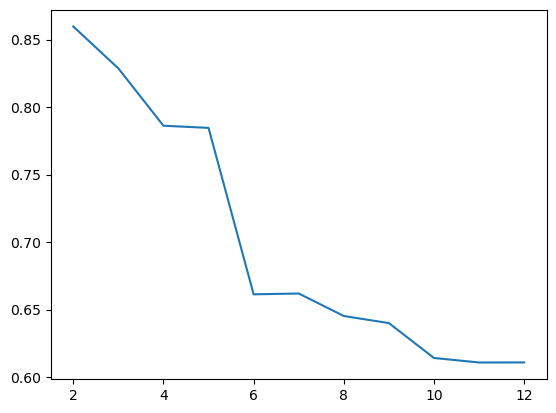

In [29]:
plt.plot(allclusters,allscore);